# IMPEMENTACIÓN A*
---
---

## Uso de tipos
---

In [80]:
# Cargar Celda

# Tipos usados para grafos y pathfinding.
from typing import List, Callable, Tuple, Any

## Nodo y Abiertos
---

In [81]:
# Cargar Celda

class Node:
    """
    Clase nodo usada para el algortimo A*.
    """
    def __init__(self, state: Any, parent: "Node", g: int, f: int):
        """
        Constructor del nodo.

        Args:
            state (Any): Estado.
            parent (Node): Nodo padre.
            g (int): Valor G del nodo.
            f (int): Valor F del nodo.
        """
        self.state = state
        self.parent = parent
        self.g = g
        self.f = f

    def getParent(self):
        return self.parent

    def getState(self):
        return self.state

    def getG(self):
        return self.g

    def getF(self):
        return self.f

    def path(self) -> List["Node"]:
        path = []

        parent = self
        while parent:
            path.append(parent.getState())
            parent = parent.getParent()
        path.reverse()

        return path
            
    def __repr__(self):
        return f"Node State: {str(self.getState())} \nNode F: {str(self.getF())}\n"
    
    def __lt__(self, o: "Node"):
        return self.getF() < o.getF()
        

    def __eq__(self, o: "Node"):
        return self.getState() == o.getState()

In [82]:
# Cargar Celda

import queue as queue

class Open:
    """
    Clase para crear la cola de prioridad de nodos abiertos.
    """
    def __init__(self):
        """
        Constructor de la cola de nodos abiertos.
        """
        self.priorityQueue = queue.PriorityQueue()

    def put(self, node: Node):
        self.priorityQueue.put((node.getF(), node))

    def pop(self) -> Node:
        return self.priorityQueue.get()

    def empty(self):
        return self.priorityQueue.empty()

    def getNode(self, state: Any):
        for elem in self.priorityQueue.queue:
            node = elem[1]
            if node.getState() == state:
                return node
        return None

    def getNodes(self):
        return [x[1] for x in self.priorityQueue.queue]

    def update(self, oldNode: "Node", newNode: "Node") -> None:
        self.priorityQueue.queue.remove((oldNode.getF(), oldNode))
        self.put(newNode)

    def __str__(self):
        return str(self.priorityQueue.queue)

## Creación A*
---

En este notebook se realizará la implementación del algoritmo A\* que funcionará primeramente sobre un grafo y posteriormente sobre un mapa 2D (un tablero).
La implementación de A\* trabajará con nodos, así que será trivial adaptar el algoritmo para que realice búsquedas en otro tipo de problemas.
Para realizar dicha adaptación solo será necesario implementar nuevas funciones de sucesores, meta y heurístico. 
De hecho, la práctica utilizará el código de este notebook, razón por la que existen ciertas celdas que comienzan por # Cargar Celda


```Python 

def AStar(inicial, sucesoresF, metaF, heuristicoF):
    '''
    Algoritmo A*. 
    Recibe:
    inicial: Nodo inicial
    sucesoresF: Función que toma un nodo y devuelve una lista de nodos sucesores (dependerá de cada problema).
    metaF: Función que toma un estado y devuelve True si es un estado meta (dependerá de cada problema)
    heuristicoF: Función que toma un estado y devuelve un valor númerico con la estimación del coste restante para llegar a una meta (dependerá de cada problema)
    
    Return: solución [estado1, estado2,..., estadoN] o [] si no hay solución
    '''
    
    '''
    creo abiertos y cerrados.
    abiertos se inicializa con el nodo inicial.
    cerrados estará vacía
    
    mientras abiertos no esté vacía:
        recupero de abiertos el nodo con menor f (nodoActual).
        guardo nodoActual en cerrados.
        compruebo si es meta:
            si lo es devuelve el camino
        obtengo los sucesores, la función genera sucesores recibe a la que calcula la h
        para suc en sucesores:
            si no está en abiertos ni en cerrados 
                lo meto en abiertos
            está en abiertos pero suc tiene menor f
                lo actualizo en abiertos
            esta en cerrados pero suc tiene menor f
                lo elimino de cerrados y lo meto en abiertos
    devuelvo [], no había solución
    '''
        
```       

In [83]:
# Cargar Celda

def AStar(initial: Node,
          successorsF: Callable[[Node, Callable[[Any], int]], List[Node]],
          goalF: Callable[[Node], bool],
          heuristicF: Callable[[Any], int]) -> List[Node]:
    """
    Algoritmo A* de búsqueda de meta dada una función de sucesores, meta y heurística.

    Args:
        initial (Node): Nodo de inicio.
        successorsF (Callable[[Node, Callable[[Any], int]], List[Node]]): Función de sucesores.
        goalF (Callable[[Node], bool]): Fución meta.
        heuristicF (Callable[[Any], int]): Función valor de heurística.

    Returns:
        List[Node]: Lista de nodos desde el inicio hasta la solución.
    """
    opened = Open()
    opened.put(initial)
    closed = {}

    while opened:
        f, current = opened.pop()
        #print(f"F -> {f}\nActual -> {current}")
        closed[current.getState()] = current

        if goalF(current):
            return current.path()

        successors = successorsF(current, heuristicF)
        #print(f"Sucesores -> {successors}")
        #print("-" * 90)

        for suc in successors:
            suc_open = opened.getNode(suc.getState())
            suc_closed = closed.get(suc.getState())

            if not (suc_open or suc_closed):
                opened.put(suc)
            elif suc_open and suc.getF() < suc_open.getF():
                opened.update(suc_open, suc)
            elif suc_closed and suc.getF() < suc_closed.getF():
                closed.pop(suc.getState())
                opened.put(suc)

    return []  # No solución.


## Ejemplos 
---

### > Grafos
---

Para probar el algoritmo de A\* en un problema sencillo y con solución y traza conocida se va a crear un grafo como el de los apuntes de teoría usando la librería networkx. 

Básicamente el grafo se crea con nx.Graph(), con nx.DiGraph() le estoy diciendo que es dirigido.

Se crean nodos con add_node y se crean arcos con add_edge

los hijos del nodo 1 son:
[2, 3]


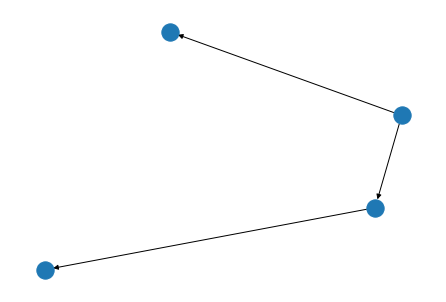

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

# Creo el grafo
Gprueba = nx.DiGraph()

# Escribo el nombre del nodo, como argumento
Gprueba.add_node(1)    
Gprueba.add_node(2)    
Gprueba.add_node(3)    

# Escribo los nombres de los nodos que forman el arco, como argumento(s)
Gprueba.add_edge(1,2)
Gprueba.add_edge(1,3)
Gprueba.add_edge(2,4)

# Consulto los hijos del nodo 1. El grafo "G" funciona como un diccionario
print("los hijos del nodo 1 son:")
print(list(Gprueba[1].keys()))


nx.draw(Gprueba)

> Sabiendo estos conceptos básicos de creación de grafos, se va a pasar a crear un grafo como el de los apuntes de teoría.

#### Funciones de sucesores, meta y heurística sobre el grafo

A continuación se pueden ver como serían las funciones de sucesores, meta y heurística para el problema de la búsqueda en el grafo.

- Para crear un nodo inicial se le pasa al constuctor de Nodo el estado inicial, su nodo padre que en el caso inicial sería None, el valor de G que es 0 y el valor de F que sería G+H, en el caso inicial como G es 0, solo haría falta H.

- sucesoresGrafo. Se obtienen los sucesores, como el grafo 'Grafo' es un diccionario solamente tenemos que consultar las claves disponibles. Se actualiza la G usando el coste necesario para llegar al hijo que se saca del diccionario de costes. Se calcula la H invocando a la función heuristicaF.

- metaGrafo. Solamente compara que el estado sea o no sea 'G' que es el valor del estado meta.
- heuristicaGrafo. Consulta en el diccionario de valores heurísticos.

Grafo similar al de 'Teoría', para A*


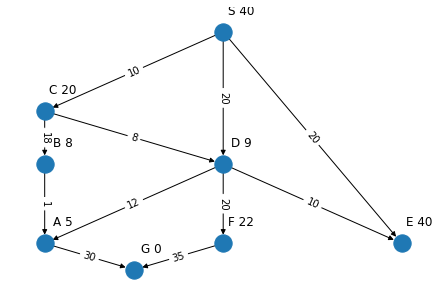

In [85]:
Graph = nx.DiGraph()

# Este diccionario almacena los hijos que tiene cada padre
childs = {'S': 'CDE', 'C': 'BD', 'B': 'A', 'D': 'AFE', 'A': 'G', 'F': 'G'}

# Este diccionario almacena los costes de cada camino
costs = {('S', 'C'): 10, ('S', 'D'): 20, ('S', 'E'): 20, ('C', 'B'): 18,
         ('C', 'D'):  8, ('B', 'A'):  1, ('D', 'A'): 12, ('D', 'F'): 20,
         ('D', 'E'): 10, ('A', 'G'): 30, ('F', 'G'): 35}

# Este diccionario almacena los valores heurísticos de cada estado.
heuristic = {'S': 40, 'C': 20, 'B': 8, 'D': 9, 'A': 5, 'F': 22, 'E': 40, 'G': 0}

# Este diccionario almacena las posiciones de cada nodo. Sólo es a efectos estéticos.
positions = {'S':(20,100), 'C':(10,70),
             'B':(10,50),  'D':(20,50),
             'A':(10,20),  'F':(20,20),
             'E':(30,20),  'G':(15,10)}

# Se crea el grafo, y se añaden: (1) nodos y (2) arcos
node_labels={}
for node in heuristic:
    Graph.add_node(node)
    node_labels[node] = f"{node} {str(heuristic[node])}"
    if node in childs:
        for child in childs[node]:
            Graph.add_edge(node, child) 

# Se dibuja el grafo
nx.draw(Graph, pos=positions)
# Se dibujan las etiquetas de los nodos y los arcos
node_label_pos = {k:[v[0]+1,v[1]+8] for k,v in positions.items()}
node_label_handles = nx.draw_networkx_labels(Graph, pos=node_label_pos, labels=node_labels)
nx.draw_networkx_edge_labels(Graph, pos=positions, edge_labels=costs)
print("Grafo similar al de 'Teoría', para A*")

In [86]:
initialNode = Node('S', None, 0, heuristic['S'])

def successorsGraph(node: Node,
                    heuristicF: Callable[[str], int]) -> List[Node]:
    """
    Función de sucesores del grafo.

    Args:
        node (Node): Nodo a buscar sucesores.
        heuristicF (Callable[[str], int]): Función heurística.

    Returns:
        List[Node]: Sucesores.
    """
    state = node.getState()
    g = node.getG()
    childs = []
    
    for child in Graph[state].keys():
        newG = g + costs[(state, child)]
        h = heuristicF(child)
        
        childs.append(Node(child, node, newG, newG + h))
        
    return childs

def goalGraph(node: Node) -> bool:
    """
    Comprueba si el nodo pasado es meta.

    Args:
        node (Node): Nodo a comprobar.

    Returns:
        bool: Retorna si el nodo es la meta.
    """
    state = node.getState()
    return state == 'G' 

def heuristicGraph(state: str) -> int:
    """
    Función heurística del grafo.

    Args:
        state (str): Estado a comprobar la heurística del grafo.

    Returns:
        int: Valor de la heurística.
    """
    return heuristic[state]                

print(f"Heurística del nodo inicial {initialNode.getState()}: {heuristicGraph(initialNode.getState())}")
print(f"Es meta: {goalGraph(initialNode)}")
print("\nSucesores: \n")
for i, suc in enumerate(successorsGraph(initialNode, heuristicGraph)):
    print(f"Sucesor {i + 1}: {suc.getState()}")
    

Heurística del nodo inicial S: 40
Es meta: False

Sucesores: 

Sucesor 1: C
Sucesor 2: D
Sucesor 3: E


In [87]:
# Comprobamos la solución con el A*.

AStar(initialNode, successorsGraph, goalGraph, heuristicGraph)

['S', 'C', 'B', 'A', 'G']

#### Trazas más ricas

A la hora de depurar el algoritmo A\* es posible que las listas de abiertos y cerrados sean tan grandes que con un print no entendamos nada.

Se puede generar una tabla HTML con el resultado de una lista usando **pandas**, una librería de python para el tratamiento de tablas de datos que está incluida en Anaconda.

In [88]:
from IPython.display import display
import pandas as pd
import numpy as np

debugData = []

columns = ["Actual","Abiertos", "Sucesores", "Cerrados"]
debugData.append(["Nodo actual",
                  str(list(range(1,20))),
                  str(["suc1","suc2","suc3"]),
                  str(list(range(1,20)))])

pd.DataFrame(np.array(debugData), columns=columns)

,Actual,Abiertos,Sucesores,Cerrados
0,Nodo actual,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['suc1', 'suc2', 'suc3']","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


### > PATHFINDING
---
En mismo código de A\* lo vamos a usar para resolver un problema de *path finding* (movernos del punto A al punto B en una matriz 2D)

#### Explicación de la representación del mapa y los estados

* El mapa va a ser una lista en 2D con 0s en las casillas libres y 1s en los obstaculos
* Un estado van a ser coordenadas (y,x)
* Una tupla (y,x).

In [89]:
# Cargar Celda

board = [[1, 1, 1, 1, 1, 1, 1, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 0, 0, 0, 1],
         [1, 0, 1, 0, 0, 1, 1, 1],
         [1, 1, 1, 0, 1, 0, 0, 1],
         [1, 0, 1, 0, 0, 0, 0, 1],
         [1, 1, 1, 1, 1, 1, 1, 1]]

initialStatePF = (1, 1)
finalStatePF = (5, 6)

In [90]:
# Cargar Celda

movements = ((1, 0), (-1, 0), (0, 1), (0, -1))


def isGoal(node: Node) -> bool:
    """
    Comprueba si nodo es meta en PF.

    Args:
        node (Node): Nodo.

    Returns:
        bool: Es meta.
    """
    return node.getState() == finalStatePF


def isValid(state: Tuple[int, int]) -> bool:
    """
    Comrpeuba si el estado es válido en PF.

    Args:
        state (Tuple[int, int]): Estado.

    Returns:
        bool: Es válido.
    """
    x, y = state
    return 0 <= x < len(board) and 0 <= y < len(board[0]) and board[x][y] == 0


def heuristicPF(state: Tuple[int, int]) -> int:
    """
    Función de heurística PF.

    Args:
        state (Tuple[int, int]): Estado.

    Returns:
        int: Valor de heurística.
    """
    x, y = state
    finalX, finalY = finalStatePF
    return abs(x - finalX) + abs(y - finalY)


def successorsPF(node: Node,
                 heuristicPF: Callable[[Tuple[int, int]], int]) -> List[Node]:
    """
    Sucesores de un nodo en PF.

    Args:
        node (Node): Nodo.
        heuristicPF (Callable[[Tuple[int, int]], int]): Función de heurística PF.

    Returns:
        List[Node]: Sucesores.
    """
    childs: List[Node] = []
    x, y = node.getState()

    for mov in movements:
        current = (x + mov[0], y + mov[1])

        if isValid(current):
            new_g = node.getG() + 1
            new_f = new_g + heuristicPF(current)

            childs.append(Node(current, node, new_g, new_f))

    return childs


In [91]:
# Cargar Celda

def createInitialNodePF(initialState: Tuple[int, int],
                        finalState: Tuple[int, int],
                        newBoard: List[List[int]],
                        heuristic: Callable[[Tuple[int, int]], int]) -> Node:
    """
    Creación del nodo incial en F.

    Args:
        initialState (Tuple[int, int]): Estado inicial.
        finalState (Tuple[int, int]): Estado final.
        newBoard (List[List[int]]): Tablero en el que buscar.
        heuristic (Callable[[Tuple[int, int]], int]): Función de heurísitca PF a usar.

    Returns:
        Node: [description]
    """
    global finalStatePF
    global board
    
    finalStatePF = finalState
    board = newBoard
    
    return Node(initialState, None, 0, heuristic(initialState))

In [92]:
# Cargar Celda

# Dibuja el tablero.

def draw(path: List[Tuple[int, int]],
         board: List[List[int]]):
    """
    Dibuja el tablero de PF con la solución.

    Args:
        path (List[Tuple[int, int]]): Solución.
        board (List[List[int]]): Tablero.

    Returns:
        [str]: String con el tablero dibujado.
    """
    drawing = ""
    for x, row in enumerate(board):
        row_drawing = ""
        for y, elem in enumerate(row):
            if (x, y) in path:
                row_drawing += "[]"
            elif elem == 1:
                row_drawing += "██"
            else:
                row_drawing += "  "
        drawing += f"{row_drawing}\n"

    print(drawing)

* #### Salida PF

In [93]:
initialNodePF = createInitialNodePF(initialStatePF, finalStatePF, board, heuristicPF)

sol = AStar(initialNodePF, successorsPF, isGoal, heuristicPF)

print("Solution: \n")
draw(sol, board)
for i, s in enumerate(sol):
    print(f"Step {i}: {s}")

Solution: 

████████████████
██[][][][]    ██
██  ████[]    ██
██  ██[][]██████
██████[]██    ██
██  ██[][][][]██
████████████████

Step 0: (1, 1)
Step 1: (1, 2)
Step 2: (1, 3)
Step 3: (1, 4)
Step 4: (2, 4)
Step 5: (3, 4)
Step 6: (3, 3)
Step 7: (4, 3)
Step 8: (5, 3)
Step 9: (5, 4)
Step 10: (5, 5)
Step 11: (5, 6)
